In [199]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [200]:

import numpy as np
# load the data
df = pd.read_csv('C:/Users/Pc/Desktop/87/der5.csv')  # read the data
df["timestamp"] = df["timestamp"].astype(np.datetime64)  # set the data type of the datetime column to np.datetime64
df.set_index("timestamp", inplace=True)  # set the datetime columns to be the index
df.index.name = "datetime"  # change the name of the index

# show the data frame
df.head()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
datetime,,,,,,,,,,,,
2014-03-03 09:05:00,184364,12.795334,9.492634,3.067739,27.491858,28.197611,577.653259,56.726326,103.334358,0.0,608.645691,66.023438
2014-03-03 09:10:00,184365,13.271334,9.846433,3.322313,27.684269,28.376522,597.745728,57.511955,92.613068,0.0,630.203308,66.803787
2014-03-03 09:15:00,184365,13.765000,10.224766,3.121739,27.916883,28.318645,617.808044,59.402908,90.972404,0.0,650.381836,66.751114
2014-03-03 09:20:00,184366,14.235665,10.579167,3.642523,28.312077,27.694969,636.739075,59.612343,109.079704,0.0,672.075012,68.793976
2014-03-03 09:25:00,184367,14.723334,10.934232,3.397937,28.210766,27.608768,657.132202,61.525471,95.444321,0.0,691.231262,68.232338


In [210]:

df.drop('Active_Energy_Delivered_Received', axis=1, inplace=True) # ici  j'ai eleminé les 2 premiers colonnes pour avoir Puissance Active on premier ligne
df.drop('Current_Phase_Average', axis=1, inplace=True)

In [211]:
df.shape

(2200, 10)

In [212]:
df.columns

Index(['Active_Power', 'Wind_Speed', 'Weather_Temperature_Celsius',
       'Weather_Relative_Humidity', 'Global_Horizontal_Radiation',
       'Diffuse_Horizontal_Radiation', 'Wind_Direction',
       'Weather_Daily_Rainfall', 'Radiation_Global_Tilted',
       'Radiation_Diffuse_Tilted'],
      dtype='object')

In [213]:
for j in range(1,10):
       print(df.iloc[:, j].unique())

[3.06773881 3.32231311 3.12173855 ... 0.81933504 0.85523462 0.95331169]
[27.49185753 27.68426895 27.91688347 ... 23.53277588 23.30053329
 23.12615204]
[28.19761086 28.37652206 28.31864548 ... 42.03522491 42.25265884
 42.22129059]
[577.65325928 597.74572754 617.80804443 ...   2.87266827   3.09918904
   2.8971808 ]
[56.72632599 57.51195526 59.40290833 ...  1.34036493  1.52146816
  1.30575657]
[103.33435822  92.61306763  90.97240448 ... 254.5058136  251.41659546
 244.06813049]
[0.  0.2]
[608.64569092 630.20330811 650.38183594 ...   1.86969209   2.0181284
   1.9229933 ]
[66.0234375  66.80378723 66.75111389 ...  2.14083934  2.25335932
  2.15976262]


In [214]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,10):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[]

In [215]:
for j in range(0,10):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

Active_Power                    0
Wind_Speed                      0
Weather_Temperature_Celsius     0
Weather_Relative_Humidity       0
Global_Horizontal_Radiation     0
Diffuse_Horizontal_Radiation    0
Wind_Direction                  0
Weather_Daily_Rainfall          0
Radiation_Global_Tilted         0
Radiation_Diffuse_Tilted        0
dtype: int64

In [216]:
df.describe()

,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,4.237303,2.477313,27.224985,41.481960,264.042959,87.510581,134.050625,0.001273,275.209398,89.003586
std,5.751036,1.485451,4.918724,17.417336,356.770354,123.656222,183.894197,0.015907,366.549871,122.145482
min,-0.000400,0.415914,16.255358,13.625167,1.210690,0.468869,-4813.745605,0.000000,0.326488,1.274527
25%,0.000000,1.078931,23.376033,25.994257,2.747100,1.245293,93.787054,0.000000,2.301455,2.046377
50%,0.213900,2.330979,27.360373,41.520535,24.926072,17.249500,124.182362,0.000000,27.831407,20.169538
75%,7.566008,3.608299,31.408018,52.824252,461.726875,150.749496,191.537148,0.000000,493.392540,151.975197
max,19.160465,7.759677,36.402561,84.568130,1248.428101,588.016296,325.864502,0.200000,1294.795410,528.533386


In [217]:
df['Active_Power'].resample('D').sum()

datetime
2014-03-03    1387.239903
2014-03-04    1338.851737
2014-03-05     843.604933
2014-03-06    1170.914602
2014-03-07    1220.503394
2014-03-08     644.406804
2014-03-09    1397.180066
2014-03-10    1319.365935
2014-03-11       0.000133
Freq: D, Name: Active_Power, dtype: float64

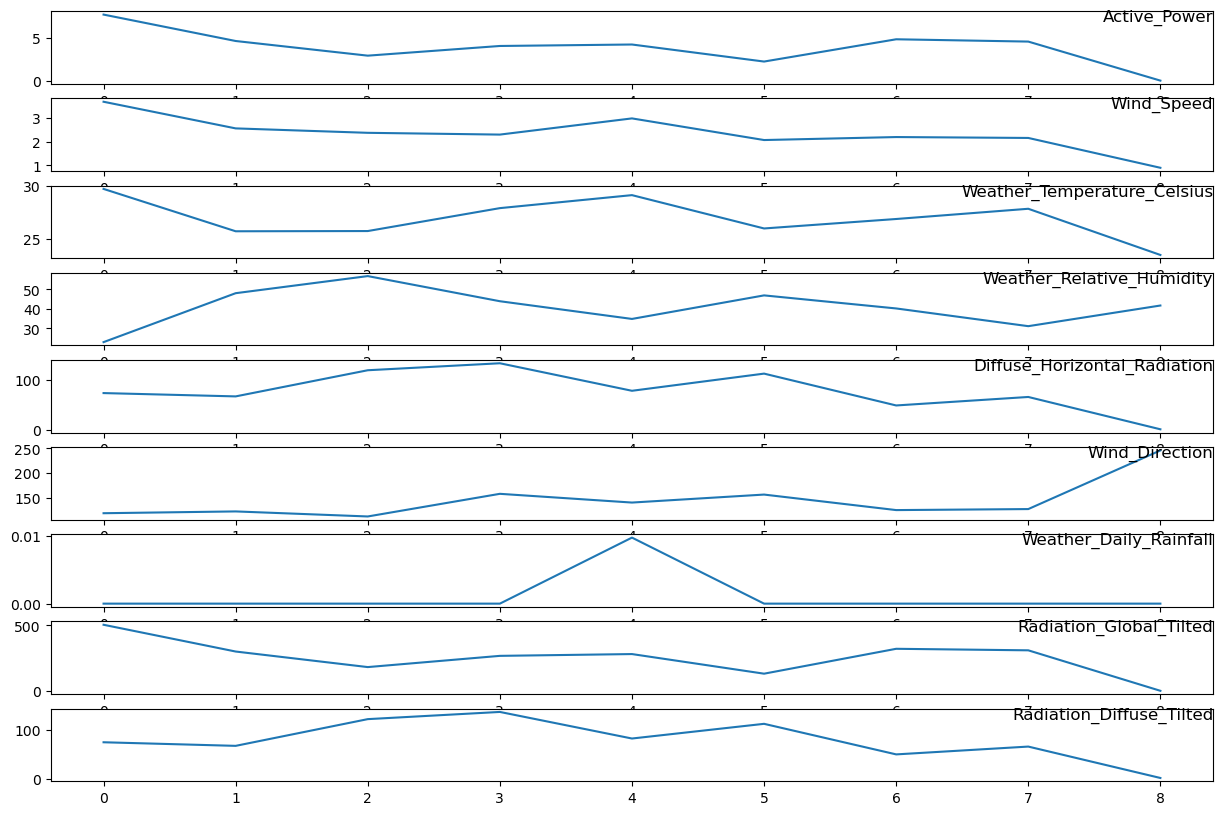

In [221]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6, 7, 8, 9]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

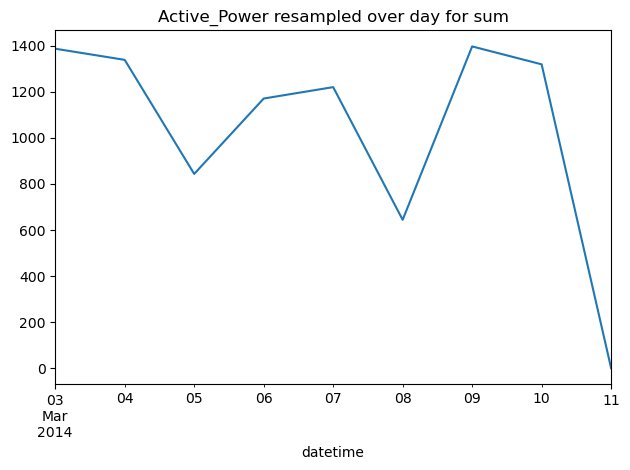

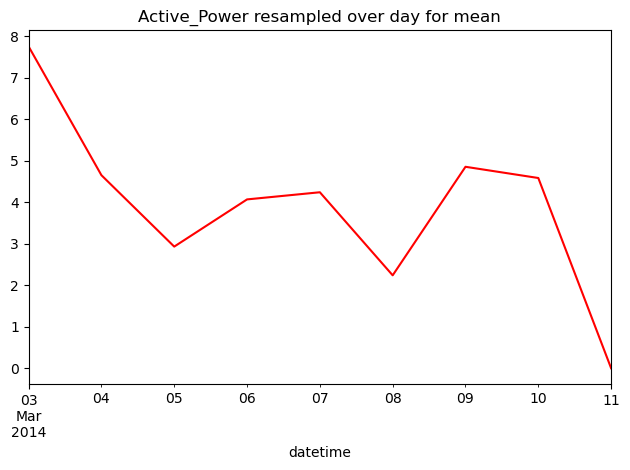

In [116]:
df.Active_Power.resample('D').sum().plot(title='Active_Power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Active_Power.resample('D').mean().plot(title='Active_Power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

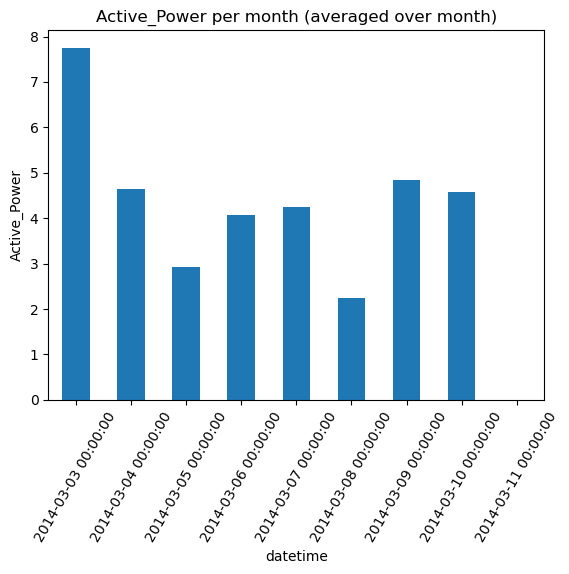

In [117]:
# Sum of 'Global_active_power' resampled over month
df['Active_Power'].resample('D').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Active_Power')
plt.title('Active_Power per month (averaged over month)')
plt.show()

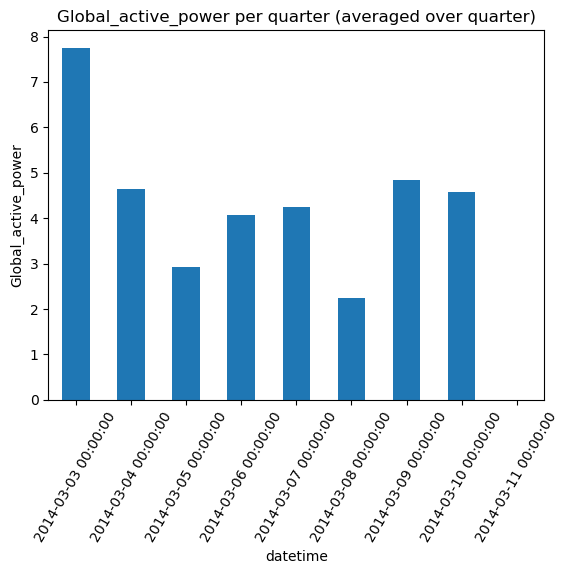

In [118]:
df['Active_Power'].resample('D').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

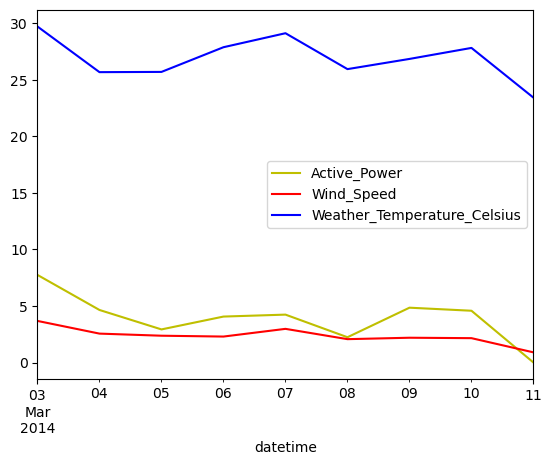

In [119]:
## resampling over week and computing mean
df.Active_Power.resample('D').mean().plot(color='y', legend=True)
df.Wind_Speed.resample('D').mean().plot(color='r', legend=True)
df.Weather_Temperature_Celsius.resample('D').mean().plot(color='b', legend=True)
#df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

In [120]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [121]:

## If you would like to train based on the resampled data (over hour), then used below
values = df.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.495439   0.361099   0.557720   0.205411   0.462183   0.095750   
2   0.513903   0.395764   0.567270   0.207933   0.478293   0.097087   
3   0.533648   0.368452   0.578816   0.207117   0.494378   0.100305   
4   0.552145   0.439367   0.598431   0.198326   0.509557   0.100662   
5   0.570675   0.406062   0.593403   0.197110   0.525908   0.103918   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  
1   0.956703        0.0   0.469937    0.122803  
2   0.954617        0.0   0.486591    0.124283  
3   0.954298        0.0   0.502179    0.124183  
4   0.957821        0.0   0.518938    0.128057  
5   0.955168        0.0   0.533736    0.126992  


In [184]:
# split into train and test sets
values = reframed.values

n_train_time = 1800
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1800, 1, 9) (1800,) (399, 1, 9) (399,)


Epoch 1/100
26/26 - 9s - loss: 0.0348 - val_loss: 0.0087 - 9s/epoch - 347ms/step
Epoch 2/100
26/26 - 4s - loss: 0.0347 - val_loss: 0.0205 - 4s/epoch - 148ms/step
Epoch 3/100
26/26 - 4s - loss: 0.0256 - val_loss: 0.0127 - 4s/epoch - 151ms/step
Epoch 4/100
26/26 - 4s - loss: 0.0143 - val_loss: 0.0069 - 4s/epoch - 146ms/step
Epoch 5/100
26/26 - 4s - loss: 0.0080 - val_loss: 0.0021 - 4s/epoch - 146ms/step
Epoch 6/100
26/26 - 4s - loss: 0.0035 - val_loss: 5.2309e-04 - 4s/epoch - 151ms/step
Epoch 7/100
26/26 - 4s - loss: 0.0012 - val_loss: 7.9570e-04 - 4s/epoch - 149ms/step
Epoch 8/100
26/26 - 4s - loss: 7.6024e-04 - val_loss: 6.1178e-04 - 4s/epoch - 150ms/step
Epoch 9/100
26/26 - 4s - loss: 7.0017e-04 - val_loss: 5.3627e-04 - 4s/epoch - 148ms/step
Epoch 10/100
26/26 - 4s - loss: 6.6629e-04 - val_loss: 4.9445e-04 - 4s/epoch - 149ms/step
Epoch 11/100
26/26 - 4s - loss: 6.3401e-04 - val_loss: 4.4283e-04 - 4s/epoch - 152ms/step
Epoch 12/100
26/26 - 4s - loss: 6.4493e-04 - val_loss: 4.8056e-04 -

Epoch 93/100
26/26 - 5s - loss: 7.5654e-04 - val_loss: 4.1379e-04 - 5s/epoch - 174ms/step
Epoch 94/100
26/26 - 4s - loss: 7.8722e-04 - val_loss: 4.4338e-04 - 4s/epoch - 161ms/step
Epoch 95/100
26/26 - 4s - loss: 8.1845e-04 - val_loss: 4.2571e-04 - 4s/epoch - 168ms/step
Epoch 96/100
26/26 - 4s - loss: 7.6868e-04 - val_loss: 4.0890e-04 - 4s/epoch - 163ms/step
Epoch 97/100
26/26 - 4s - loss: 7.6562e-04 - val_loss: 4.4817e-04 - 4s/epoch - 161ms/step
Epoch 98/100
26/26 - 5s - loss: 7.5632e-04 - val_loss: 3.6084e-04 - 5s/epoch - 175ms/step
Epoch 99/100
26/26 - 4s - loss: 7.7090e-04 - val_loss: 4.3949e-04 - 4s/epoch - 163ms/step
Epoch 100/100
26/26 - 5s - loss: 7.7936e-04 - val_loss: 3.5595e-04 - 5s/epoch - 173ms/step


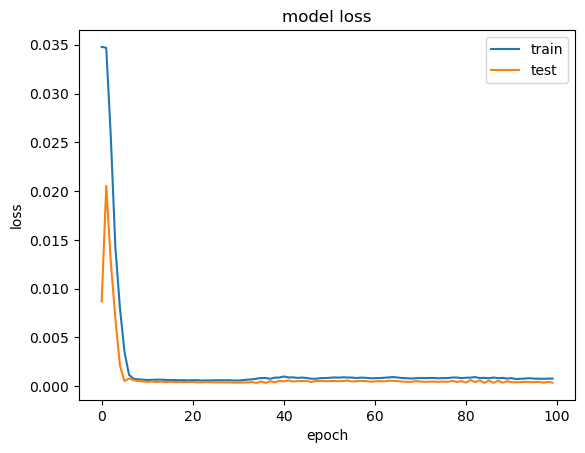

In [186]:
model = Sequential()
model.add(LSTM(2000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Let`s import all packages that we may need:




In [187]:
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:

from keras.layers import Dropout# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

13/13 [==============================] - 1s 19ms/step
Test RMSE: 0.361


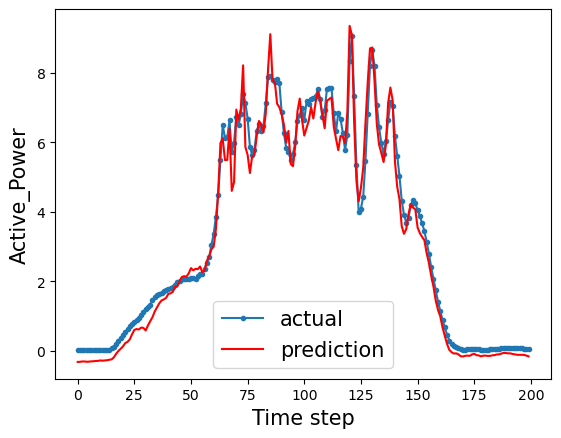

In [188]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 step (200 of 5 min) . 

aa=[x for x in range(0,200)]
plt.plot(aa, inv_y[170:370], marker='.', label="actual")
plt.plot(aa, inv_yhat[170:370], 'r', label="prediction")
plt.ylabel('Active_Power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
#plt.yticks([])
plt.show()